In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geopy.geocoders

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
CLIENT_ID = 'URC3HEHN0GIOOXFIMZYYLQFJDBFFCLMJGCCIM5Y1WTDNPIH3' # your Foursquare ID
CLIENT_SECRET = 'FFFCUB3GQKHQRAKV1TD0NRXBQEFYSYFMR0VACHBVK4J13PRU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: URC3HEHN0GIOOXFIMZYYLQFJDBFFCLMJGCCIM5Y1WTDNPIH3
CLIENT_SECRET:FFFCUB3GQKHQRAKV1TD0NRXBQEFYSYFMR0VACHBVK4J13PRU


In [3]:
# type your answer here
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    '43.7001', 
    '-79.4163', 
    radius, 
    LIMIT)

In [4]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60ba042947eef137c695cc47'},
 'response': {'headerLocation': 'Forest Hill South',
  'headerFullLocation': 'Forest Hill South, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 11,
  'suggestedBounds': {'ne': {'lat': 43.7046000045, 'lng': -79.41008725576462},
   'sw': {'lat': 43.6955999955, 'lng': -79.42251274423539}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b896ec4f964a520bd3532e3',
       'name': 'Hotel Gelato',
       'location': {'address': '532 Eglinton Ave. W',
        'crossStreet': 'at Heddington Ave.',
        'lat': 43.703477773135404,
        'lng': -79.41431071971614,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.703477773135404,
          'lng': -79.41431071971614}],
 

#### Reading the Postal code list file from link provided in project summary

In [5]:
post_codes_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv')

post_codes_df.shape

(103, 3)

In [6]:
nb_address_ = np.linspace(0,0,103)

In [7]:
geolocator = Nominatim(user_agent="asd")

In [8]:
post_codes_df['Address'] = pd.Series(nb_address_)
post_codes_df.head()

,Postal Code,Latitude,Longitude,Address
0,M1B,43.806686,-79.194353,0.0
1,M1C,43.784535,-79.160497,0.0
2,M1E,43.763573,-79.188711,0.0
3,M1G,43.770992,-79.216917,0.0
4,M1H,43.773136,-79.239476,0.0


#### Using geolocaotor reverse to get address from lat long values for each post code

In [9]:
for i in range(0, post_codes_df.shape[0]):
    #print(i)
    tmp_addr = geolocator.reverse([post_codes_df['Latitude'][i], post_codes_df['Longitude'][i]])
    post_codes_df['Address'][i] = tmp_addr
    print('adrress',i,'added')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. I

adrress 0 added
adrress 1 added
adrress 2 added
adrress 3 added
adrress 4 added
adrress 5 added
adrress 6 added
adrress 7 added
adrress 8 added
adrress 9 added
adrress 10 added
adrress 11 added
adrress 12 added
adrress 13 added
adrress 14 added
adrress 15 added
adrress 16 added
adrress 17 added
adrress 18 added
adrress 19 added
adrress 20 added
adrress 21 added
adrress 22 added
adrress 23 added
adrress 24 added
adrress 25 added
adrress 26 added
adrress 27 added
adrress 28 added
adrress 29 added
adrress 30 added
adrress 31 added
adrress 32 added
adrress 33 added
adrress 34 added
adrress 35 added
adrress 36 added
adrress 37 added
adrress 38 added
adrress 39 added
adrress 40 added
adrress 41 added
adrress 42 added
adrress 43 added
adrress 44 added
adrress 45 added
adrress 46 added
adrress 47 added
adrress 48 added
adrress 49 added
adrress 50 added
adrress 51 added
adrress 52 added
adrress 53 added
adrress 54 added
adrress 55 added
adrress 56 added
adrress 57 added
adrress 58 added
adrress

In [10]:
post_codes_df[['Postal Code','Address']]

,Postal Code,Address
0,M1B,"(61, Thornmount Drive, Scarborough—Rouge Park,..."
1,M1C,"(166, Meadowvale Road, Scarborough—Rouge Park,..."
2,M1E,"(120, Kitchener Road, West Hill, Scarborough—G..."
3,M1G,"(9, Hoshlega Drive, Scarborough—Guildwood, Sca..."
4,M1H,"(138, Amberjack Boulevard, Scarborough—Guildwo..."
5,M1J,"(John McCrae Public School, 431, McCowan Road,..."
6,M1K,"(51, Merrian Road, Kennedy Park, Scarborough S..."
7,M1L,"(Providence Healthcare, 3276, St Clair Avenue ..."
8,M1M,"(26, Thatcher Avenue, Cliffcrest, Scarborough ..."
9,M1N,"(91, Birchcliff Avenue, Birchcliff, Scarboroug..."


#### Appending Borough and neighborhood column from list of Boroughs as per Postal code

In [11]:
nb_list = [' Scarborough', ' North York', ' East York', ' East Toronto', ' Central Toronto', ' Downtown Toronto', ' West Toronto',' York', ' Queens Park',' Etobicoke', ' Beaches—East York', ' Toronto—Danforth',' Don Valley West', ' Spadina—Fort York', ' Toronto Centre', ' University-Rosedale', ' Eglinton—Lawrence', ' Parkdale', ' Old Toronto', ' Mississauga']

In [12]:
post_codes_df['Borough'] = np.linspace(0,0,103)

In [13]:
post_codes_df.head()

,Postal Code,Latitude,Longitude,Address,Borough
0,M1B,43.806686,-79.194353,"(61, Thornmount Drive, Scarborough—Rouge Park,...",0.0
1,M1C,43.784535,-79.160497,"(166, Meadowvale Road, Scarborough—Rouge Park,...",0.0
2,M1E,43.763573,-79.188711,"(120, Kitchener Road, West Hill, Scarborough—G...",0.0
3,M1G,43.770992,-79.216917,"(9, Hoshlega Drive, Scarborough—Guildwood, Sca...",0.0
4,M1H,43.773136,-79.239476,"(138, Amberjack Boulevard, Scarborough—Guildwo...",0.0


In [14]:
post_codes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Postal Code  103 non-null    object 
 1   Latitude     103 non-null    float64
 2   Longitude    103 non-null    float64
 3   Address      103 non-null    object 
 4   Borough      103 non-null    float64
dtypes: float64(3), object(2)
memory usage: 4.1+ KB


#### Adding Borough Names

In [15]:
for j, bor in enumerate(nb_list):
    for i in range(0, post_codes_df.shape[0]):
        tmp_addr = str(post_codes_df['Address'][i]).split(',')
        print(tmp_addr)
        for k, val in enumerate(tmp_addr):
            if (val == bor):
                print(bor, 'in address', i)
                post_codes_df['Borough'][i] = bor
                print("borough added for address", i)
                break
            else:
                print("Bor", bor, "not in address", i)
    #tmp_addr = geolocator.reverse([post_codes_df['Latitude'][i], post_codes_df['Longitude'][i]])
    #post_codes_df['Address'][i] = tmp_addr
    #print('adrress',i,'added')

['61', ' Thornmount Drive', ' Scarborough—Rouge Park', ' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario', ' M1B 3M5', ' Canada']
Bor  Scarborough not in address 0
Bor  Scarborough not in address 0
Bor  Scarborough not in address 0
 Scarborough in address 0
borough added for address 0
['166', ' Meadowvale Road', ' Scarborough—Rouge Park', ' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario', ' M1C 2J1', ' Canada']
Bor  Scarborough not in address 1
Bor  Scarborough not in address 1
Bor  Scarborough not in address 1
 Scarborough in address 1
borough added for address 1
['120', ' Kitchener Road', ' West Hill', ' Scarborough—Guildwood', ' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario', ' M1E 1Z7', ' Canada']
Bor  Scarborough not in address 2
Bor  Scarborough not in address 2
Bor  Scarborough not in address 2
Bor  Scarborough not in address 2
 Scarborough in address 2
borough added for address 2
['9', ' Hoshlega Drive', ' Scarborough—Guildwood', ' Scarborough', ' 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


51
Bor  Scarborough not in address 51
Bor  Scarborough not in address 51
Bor  Scarborough not in address 51
Bor  Scarborough not in address 51
Bor  Scarborough not in address 51
Bor  Scarborough not in address 51
Bor  Scarborough not in address 51
Bor  Scarborough not in address 51
['22', ' Wellesley Street East', ' Church-Wellesley Village', ' Toronto Centre', ' Old Toronto', ' Toronto', ' Golden Horseshoe', ' Ontario', ' M4Y 2C9', ' Canada']
Bor  Scarborough not in address 52
Bor  Scarborough not in address 52
Bor  Scarborough not in address 52
Bor  Scarborough not in address 52
Bor  Scarborough not in address 52
Bor  Scarborough not in address 52
Bor  Scarborough not in address 52
Bor  Scarborough not in address 52
Bor  Scarborough not in address 52
Bor  Scarborough not in address 52
['412', ' King Street East', ' Corktown', ' Toronto Centre', ' Old Toronto', ' Toronto', ' Golden Horseshoe', ' Ontario', ' M5A 1G1', ' Canada']
Bor  Scarborough not in address 53
Bor  Scarborough not i

#### Checking if any Borough data is excluded

In [16]:
post_codes_df[post_codes_df['Borough']==0]

,Postal Code,Latitude,Longitude,Address,Borough


In [17]:
post_codes_df.columns

Index(['Postal Code', 'Latitude', 'Longitude', 'Address', 'Borough'], dtype='object')

#### Adding Neighborhood column

In [18]:
post_codes_df['Neighborhood'] = np.linspace(0,0,103)

In [19]:
post_codes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Postal Code   103 non-null    object 
 1   Latitude      103 non-null    float64
 2   Longitude     103 non-null    float64
 3   Address       103 non-null    object 
 4   Borough       103 non-null    object 
 5   Neighborhood  103 non-null    float64
dtypes: float64(3), object(3)
memory usage: 5.0+ KB


In [20]:
for i in range(0, post_codes_df.shape[0]):
    tmp_neig = []
    bor = post_codes_df['Borough'][i]
    tmp_addr = str(post_codes_df['Address'][i]).split(',')
    tmp_neig = tmp_addr[-6:-2]
    print(tmp_neig)
    for k, val in enumerate(tmp_neig):
        post_codes_df['Neighborhood'][i] = str(tmp_neig)

post_codes_df['Neighborhood']

[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarb

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


0      [' Scarborough', ' Toronto', ' Golden Horsesho...
1      [' Scarborough', ' Toronto', ' Golden Horsesho...
2      [' Scarborough', ' Toronto', ' Golden Horsesho...
3      [' Scarborough', ' Toronto', ' Golden Horsesho...
4      [' Scarborough', ' Toronto', ' Golden Horsesho...
5      [' Scarborough', ' Toronto', ' Golden Horsesho...
6      [' Scarborough', ' Toronto', ' Golden Horsesho...
7      [' Scarborough', ' Toronto', ' Golden Horsesho...
8      [' Scarborough', ' Toronto', ' Golden Horsesho...
9      [' Scarborough', ' Toronto', ' Golden Horsesho...
10     [' Scarborough', ' Toronto', ' Golden Horsesho...
11     [' Scarborough', ' Toronto', ' Golden Horsesho...
12     [' Scarborough', ' Toronto', ' Golden Horsesho...
13     [' Scarborough', ' Toronto', ' Golden Horsesho...
14     [' Scarborough', ' Toronto', ' Golden Horsesho...
15     [' Scarborough', ' Toronto', ' Golden Horsesho...
16     [' Scarborough', ' Toronto', ' Golden Horsesho...
17     [' North York', ' Toront

In [25]:
post_codes_df.head()

,Postal Code,Latitude,Longitude,Address,Borough,Neighborhood
0,M1B,43.806686,-79.194353,"(61, Thornmount Drive, Scarborough—Rouge Park,...",Scarborough,"[' Scarborough', ' Toronto', ' Golden Horsesho..."
1,M1C,43.784535,-79.160497,"(166, Meadowvale Road, Scarborough—Rouge Park,...",Scarborough,"[' Scarborough', ' Toronto', ' Golden Horsesho..."
2,M1E,43.763573,-79.188711,"(120, Kitchener Road, West Hill, Scarborough—G...",Scarborough,"[' Scarborough', ' Toronto', ' Golden Horsesho..."
3,M1G,43.770992,-79.216917,"(9, Hoshlega Drive, Scarborough—Guildwood, Sca...",Scarborough,"[' Scarborough', ' Toronto', ' Golden Horsesho..."
4,M1H,43.773136,-79.239476,"(138, Amberjack Boulevard, Scarborough—Guildwo...",Scarborough,"[' Scarborough', ' Toronto', ' Golden Horsesho..."


In [22]:
post_codes_df.shape

(103, 6)

### Folium map of neighborhood in Toronto, CN

In [23]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto city are 43.6534817, -79.3839347.


In [26]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(post_codes_df['Latitude'], post_codes_df['Longitude'], post_codes_df['Borough'], post_codes_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Exploring neighborhood with Foursquare api

In [27]:
CLIENT_ID = 'URC3HEHN0GIOOXFIMZYYLQFJDBFFCLMJGCCIM5Y1WTDNPIH3' # your Foursquare ID
CLIENT_SECRET = 'FFFCUB3GQKHQRAKV1TD0NRXBQEFYSYFMR0VACHBVK4J13PRU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: URC3HEHN0GIOOXFIMZYYLQFJDBFFCLMJGCCIM5Y1WTDNPIH3
CLIENT_SECRET:FFFCUB3GQKHQRAKV1TD0NRXBQEFYSYFMR0VACHBVK4J13PRU


#### First Neighborhood in the Toronto Dataframe

In [36]:
toronto_data = post_codes_df.iloc[0]
toronto_data['Neighborhood']

"[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']"

In [68]:
toronto_data.head()

Postal Code                                                  M1B
Latitude                                                 43.8067
Longitude                                               -79.1944
Address        (61, Thornmount Drive, Scarborough—Rouge Park,...
Borough                                              Scarborough
Name: 0, dtype: object

In [40]:
neighborhood_latitude = toronto_data['Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_data['Longitude'] # neighborhood longitude value

neighborhood_name = toronto_data[ 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of [' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario'] are 43.806686299999996, -79.19435340000001.


#### Explore the nearby venues within 500 metres

In [41]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [42]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60ba0b840319445be2d55412'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Malvern',
  'headerFullLocation': 'Malvern, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 43.8111863045, 'lng': -79.18812958073042},
   'sw': {'lat': 43.80218629549999, 'lng': -79.2005772192696}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bb6b9446edc76b0d771311c',
       'name': 'Wendy’s',
       'location': {'crossStreet': 'Morningside & Sheppard',
        'lat': 43.80744841934756,
        'lng': -79.19905558052072,
        'labeledLatLngs': [{'label': 'display'

In [43]:
## Function to extract venues

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [44]:
## Creating data frame json file

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,name,categories,lat,lng
0,Wendy’s,Fast Food Restaurant,43.807448,-79.199056
1,Interprovincial Group,Print Shop,43.805630,-79.200378


In [45]:
## Num of venues returned by foursquare
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

2 venues were returned by Foursquare.


### Extracting venues for all the markers in Toronto

In [46]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [48]:
# type your answer here
toronto_venues = getNearbyVenues(names = post_codes_df['Neighborhood'], latitudes = post_codes_df['Latitude'], longitudes = post_codes_df['Longitude'])

[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']
[' Scarb

In [50]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"[' Scarborough', ' Toronto', ' Golden Horsesho...",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"[' Scarborough', ' Toronto', ' Golden Horsesho...",43.806686,-79.194353,Interprovincial Group,43.805630,-79.200378,Print Shop
2,"[' Scarborough', ' Toronto', ' Golden Horsesho...",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
3,"[' Scarborough', ' Toronto', ' Golden Horsesho...",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
4,"[' Scarborough', ' Toronto', ' Golden Horsesho...",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store


In [54]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"[' East York', ' Toronto', ' Golden Horseshoe', ' Ontario']",72,72,72,72,72,72
"[' Etobicoke', ' Toronto', ' Golden Horseshoe', ' Ontario']",73,73,73,73,73,73
"[' Mississauga', ' Peel Region', ' Golden Horseshoe', ' Ontario']",14,14,14,14,14,14
"[' North York', ' Toronto', ' Golden Horseshoe', ' Ontario']",254,254,254,254,254,254
"[' Old Toronto', ' Toronto', ' Golden Horseshoe', ' Ontario']",1596,1596,1596,1596,1596,1596
"[' Scarborough', ' Toronto', ' Golden Horseshoe', ' Ontario']",91,91,91,91,91,91
"[' York', ' Toronto', ' Golden Horseshoe', ' Ontario']",20,20,20,20,20,20


### Venue unique categories

In [55]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 272 uniques categories.


In [59]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [60]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,"[' East York', ' Toronto', ' Golden Horseshoe'...",0.013889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [61]:
# Top 5 common values
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----[' East York', ' Toronto', ' Golden Horseshoe', ' Ontario']----
            venue  freq
0     Coffee Shop  0.07
1            Bank  0.06
2    Intersection  0.06
3     Pizza Place  0.04
4  Sandwich Place  0.04


----[' Etobicoke', ' Toronto', ' Golden Horseshoe', ' Ontario']----
            venue  freq
0     Pizza Place  0.11
1  Sandwich Place  0.07
2     Coffee Shop  0.05
3        Pharmacy  0.05
4    Liquor Store  0.04


----[' Mississauga', ' Peel Region', ' Golden Horseshoe', ' Ontario']----
                 venue  freq
0          Coffee Shop  0.21
1                Hotel  0.14
2         Intersection  0.07
3  Fried Chicken Joint  0.07
4          Gas Station  0.07


----[' North York', ' Toronto', ' Golden Horseshoe', ' Ontario']----
            venue  freq
0     Coffee Shop  0.07
1  Clothing Store  0.06
2            Park  0.04
3      Restaurant  0.04
4     Pizza Place  0.03


----[' Old Toronto', ' Toronto', ' Golden Horseshoe', ' Ontario']----
                venue  freq
0        

In [62]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [82]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_tr = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_tr['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted_tr.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_tr.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"[' East York', ' Toronto', ' Golden Horseshoe'...",Coffee Shop,Intersection,Bank,Burger Joint,Sporting Goods Shop,Park,Sandwich Place,Pizza Place,Breakfast Spot,Pharmacy
1,"[' Etobicoke', ' Toronto', ' Golden Horseshoe'...",Pizza Place,Sandwich Place,Coffee Shop,Pharmacy,Fast Food Restaurant,Liquor Store,Gym,Grocery Store,Bakery,Beer Store
2,"[' Mississauga', ' Peel Region', ' Golden Hors...",Coffee Shop,Hotel,Fried Chicken Joint,Mediterranean Restaurant,Intersection,Middle Eastern Restaurant,Burrito Place,American Restaurant,Gas Station,Sandwich Place
3,"[' North York', ' Toronto', ' Golden Horseshoe...",Coffee Shop,Clothing Store,Restaurant,Park,Pizza Place,Fast Food Restaurant,Grocery Store,Bank,Shopping Mall,Sandwich Place
4,"[' Old Toronto', ' Toronto', ' Golden Horsesho...",Coffee Shop,Café,Restaurant,Italian Restaurant,Hotel,Park,Japanese Restaurant,Bakery,Pizza Place,Seafood Restaurant


### K-Means Clustering 

In [83]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans_tr = KMeans(n_clusters = kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_tr.labels_[0:10] 

array([4, 3, 2, 0, 0, 4, 1], dtype=int32)

In [84]:
### Clustering with Top 10 venues in each cluster

# add clustering labels
neighborhoods_venues_sorted_tr.insert(0, 'Cluster Labels', kmeans_tr.labels_)

toronto_merged = post_codes_df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted_tr.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Postal Code,Latitude,Longitude,Address,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,43.806686,-79.194353,"(61, Thornmount Drive, Scarborough—Rouge Park,...",Scarborough,"[' Scarborough', ' Toronto', ' Golden Horsesho...",4,Fast Food Restaurant,Bank,Coffee Shop,Bakery,Pizza Place,Intersection,Breakfast Spot,Chinese Restaurant,Playground,Pharmacy
1,M1C,43.784535,-79.160497,"(166, Meadowvale Road, Scarborough—Rouge Park,...",Scarborough,"[' Scarborough', ' Toronto', ' Golden Horsesho...",4,Fast Food Restaurant,Bank,Coffee Shop,Bakery,Pizza Place,Intersection,Breakfast Spot,Chinese Restaurant,Playground,Pharmacy
2,M1E,43.763573,-79.188711,"(120, Kitchener Road, West Hill, Scarborough—G...",Scarborough,"[' Scarborough', ' Toronto', ' Golden Horsesho...",4,Fast Food Restaurant,Bank,Coffee Shop,Bakery,Pizza Place,Intersection,Breakfast Spot,Chinese Restaurant,Playground,Pharmacy
3,M1G,43.770992,-79.216917,"(9, Hoshlega Drive, Scarborough—Guildwood, Sca...",Scarborough,"[' Scarborough', ' Toronto', ' Golden Horsesho...",4,Fast Food Restaurant,Bank,Coffee Shop,Bakery,Pizza Place,Intersection,Breakfast Spot,Chinese Restaurant,Playground,Pharmacy
4,M1H,43.773136,-79.239476,"(138, Amberjack Boulevard, Scarborough—Guildwo...",Scarborough,"[' Scarborough', ' Toronto', ' Golden Horsesho...",4,Fast Food Restaurant,Bank,Coffee Shop,Bakery,Pizza Place,Intersection,Breakfast Spot,Chinese Restaurant,Playground,Pharmacy


In [85]:
# create map
map_clusters_tr = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_tr)
       
map_clusters_tr

## Examine each cluster

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
cluster1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster1

,Latitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,43.803762,"[' North York', ' Toronto', ' Golden Horseshoe...",0,Coffee Shop,Clothing Store,Restaurant,Park,Pizza Place,Fast Food Restaurant,Grocery Store,Bank,Shopping Mall,Sandwich Place
18,43.778517,"[' North York', ' Toronto', ' Golden Horseshoe...",0,Coffee Shop,Clothing Store,Restaurant,Park,Pizza Place,Fast Food Restaurant,Grocery Store,Bank,Shopping Mall,Sandwich Place
19,43.786947,"[' North York', ' Toronto', ' Golden Horseshoe...",0,Coffee Shop,Clothing Store,Restaurant,Park,Pizza Place,Fast Food Restaurant,Grocery Store,Bank,Shopping Mall,Sandwich Place
20,43.757490,"[' North York', ' Toronto', ' Golden Horseshoe...",0,Coffee Shop,Clothing Store,Restaurant,Park,Pizza Place,Fast Food Restaurant,Grocery Store,Bank,Shopping Mall,Sandwich Place
21,43.789053,"[' North York', ' Toronto', ' Golden Horseshoe...",0,Coffee Shop,Clothing Store,Restaurant,Park,Pizza Place,Fast Food Restaurant,Grocery Store,Bank,Shopping Mall,Sandwich Place
22,43.770120,"[' North York', ' Toronto', ' Golden Horseshoe...",0,Coffee Shop,Clothing Store,Restaurant,Park,Pizza Place,Fast Food Restaurant,Grocery Store,Bank,Shopping Mall,Sandwich Place
23,43.752758,"[' North York', ' Toronto', ' Golden Horseshoe...",0,Coffee Shop,Clothing Store,Restaurant,Park,Pizza Place,Fast Food Restaurant,Grocery Store,Bank,Shopping Mall,Sandwich Place
24,43.782736,"[' North York', ' Toronto', ' Golden Horseshoe...",0,Coffee Shop,Clothing Store,Restaurant,Park,Pizza Place,Fast Food Restaurant,Grocery Store,Bank,Shopping Mall,Sandwich Place
25,43.753259,"[' North York', ' Toronto', ' Golden Horseshoe...",0,Coffee Shop,Clothing Store,Restaurant,Park,Pizza Place,Fast Food Restaurant,Grocery Store,Bank,Shopping Mall,Sandwich Place
26,43.745906,"[' North York', ' Toronto', ' Golden Horseshoe...",0,Coffee Shop,Clothing Store,Restaurant,Park,Pizza Place,Fast Food Restaurant,Grocery Store,Bank,Shopping Mall,Sandwich Place


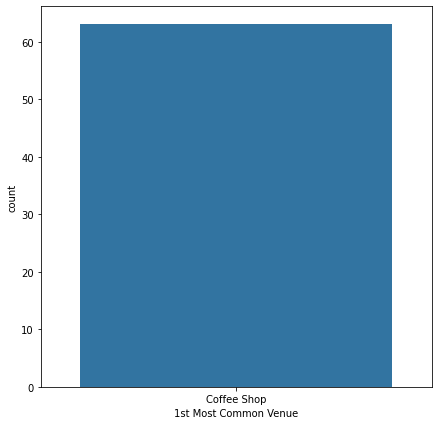

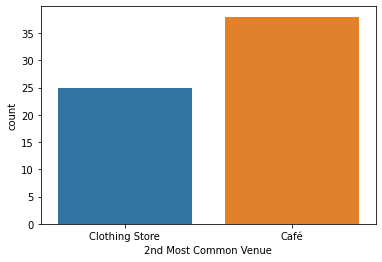

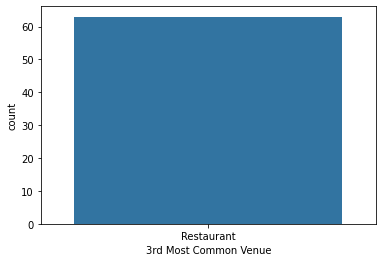

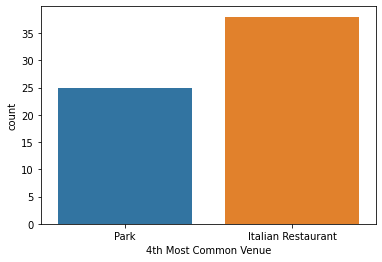

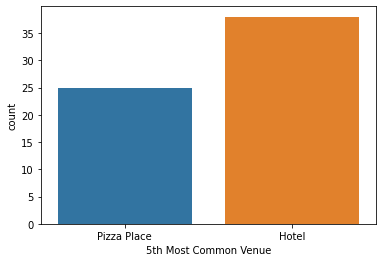

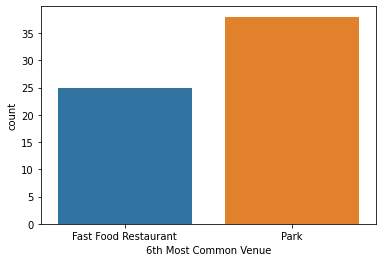

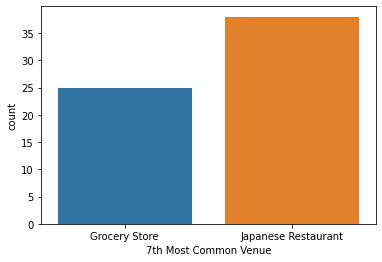

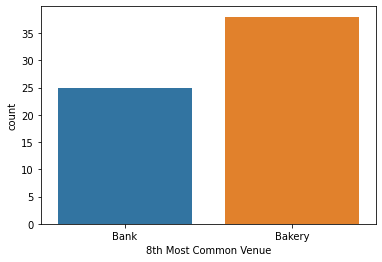

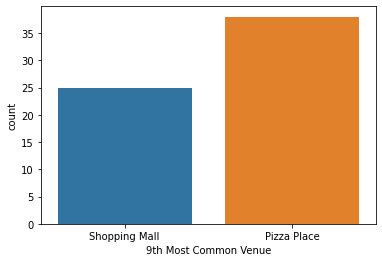

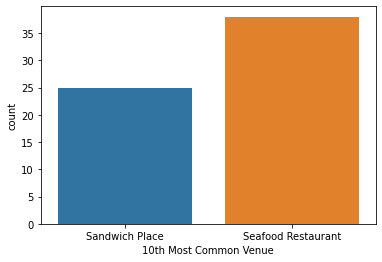

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

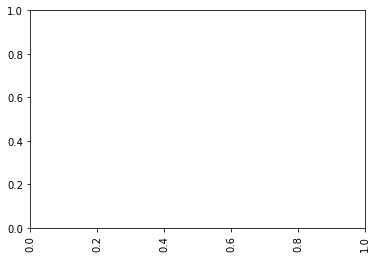

In [168]:
plt.figure(figsize = (7,7))
for h in range(3, 13):
    sns.countplot(data = cluster1, x = cluster1.iloc[:, h] )
    plt.show()
plt.xticks(rotation = 90)

### Cluster 1 - Analysis
* #### The Boroughs include Old Toronto and North York
* #### Further clustering is based on Ranking of Similar Common venues at each of the Buroughs --> Coffee shop, Clothing store, Cafe, Restaurant, Park, Italian Restaurant

## Cluster 2

In [169]:
cluster2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster2

,Latitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
73,43.693781,"[' York', ' Toronto', ' Golden Horseshoe', ' O...",1,Park,Convenience Store,Playground,Bus Line,Bar,Field,Fast Food Restaurant,Pool,Caribbean Restaurant,Hockey Arena
74,43.689026,"[' York', ' Toronto', ' Golden Horseshoe', ' O...",1,Park,Convenience Store,Playground,Bus Line,Bar,Field,Fast Food Restaurant,Pool,Caribbean Restaurant,Hockey Arena
80,43.691116,"[' York', ' Toronto', ' Golden Horseshoe', ' O...",1,Park,Convenience Store,Playground,Bus Line,Bar,Field,Fast Food Restaurant,Pool,Caribbean Restaurant,Hockey Arena
81,43.673185,"[' York', ' Toronto', ' Golden Horseshoe', ' O...",1,Park,Convenience Store,Playground,Bus Line,Bar,Field,Fast Food Restaurant,Pool,Caribbean Restaurant,Hockey Arena
98,43.706876,"[' York', ' Toronto', ' Golden Horseshoe', ' O...",1,Park,Convenience Store,Playground,Bus Line,Bar,Field,Fast Food Restaurant,Pool,Caribbean Restaurant,Hockey Arena


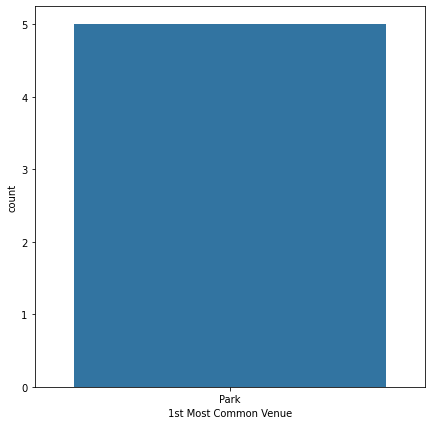

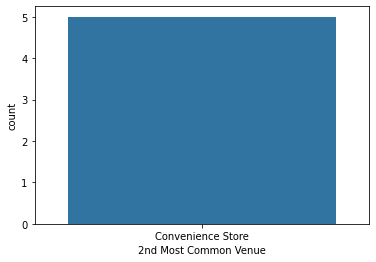

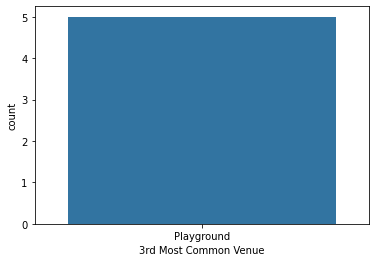

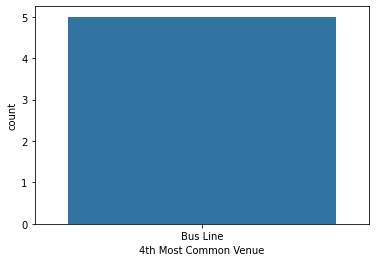

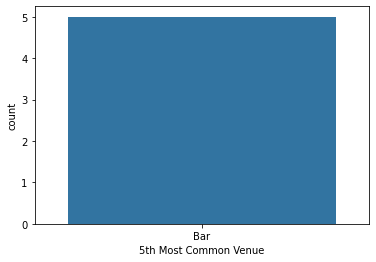

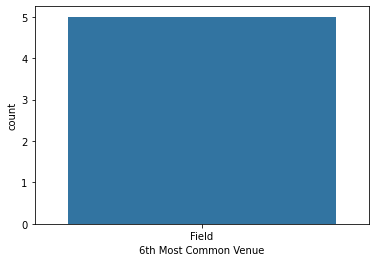

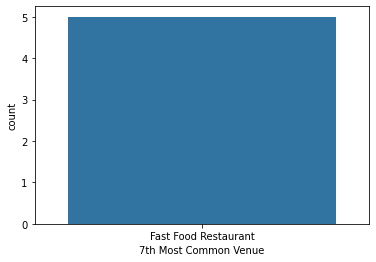

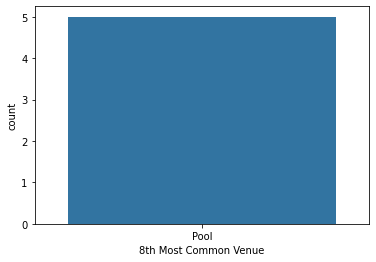

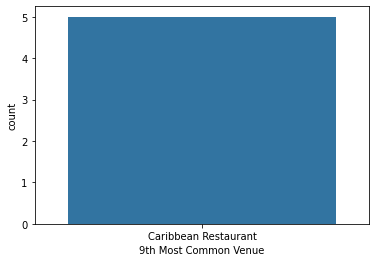

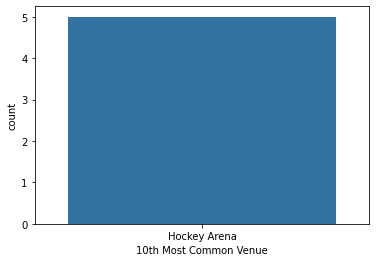

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

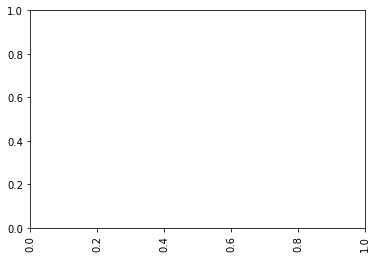

In [170]:
plt.figure(figsize = (7,7))
for h in range(3, 13):
    sns.countplot(data = cluster2, x = cluster2.iloc[:, h] )
    plt.show()
plt.xticks(rotation = 90)

### Cluster 2 - Analysis
* #### The Boroughs include York
* #### Further clustering is based on Ranking of Similar Common venues at each of the Buroughs --> Park, Playground --> this is different compared to the restaturants (Dining places in previous cluster)

### Cluster 3

In [173]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Latitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
86,43.636966,"[' Mississauga', ' Peel Region', ' Golden Hors...",2,Coffee Shop,Hotel,Fried Chicken Joint,Mediterranean Restaurant,Intersection,Middle Eastern Restaurant,Burrito Place,American Restaurant,Gas Station,Sandwich Place


### Cluster 3 - Analysis
* #### The Boroughs include Missisaugua
* #### Further clustering is based on Ranking of Similar Common venues this Burough --> places include Coffeeshop, Hotel, Dining places --> this is isolated from rest of the clusters

### Cluster 4 

In [175]:
cluster4 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster4

,Latitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
88,43.605647,"[' Etobicoke', ' Toronto', ' Golden Horseshoe'...",3,Pizza Place,Sandwich Place,Coffee Shop,Pharmacy,Fast Food Restaurant,Liquor Store,Gym,Grocery Store,Bakery,Beer Store
89,43.602414,"[' Etobicoke', ' Toronto', ' Golden Horseshoe'...",3,Pizza Place,Sandwich Place,Coffee Shop,Pharmacy,Fast Food Restaurant,Liquor Store,Gym,Grocery Store,Bakery,Beer Store
90,43.653654,"[' Etobicoke', ' Toronto', ' Golden Horseshoe'...",3,Pizza Place,Sandwich Place,Coffee Shop,Pharmacy,Fast Food Restaurant,Liquor Store,Gym,Grocery Store,Bakery,Beer Store
91,43.636258,"[' Etobicoke', ' Toronto', ' Golden Horseshoe'...",3,Pizza Place,Sandwich Place,Coffee Shop,Pharmacy,Fast Food Restaurant,Liquor Store,Gym,Grocery Store,Bakery,Beer Store
92,43.628841,"[' Etobicoke', ' Toronto', ' Golden Horseshoe'...",3,Pizza Place,Sandwich Place,Coffee Shop,Pharmacy,Fast Food Restaurant,Liquor Store,Gym,Grocery Store,Bakery,Beer Store
93,43.667856,"[' Etobicoke', ' Toronto', ' Golden Horseshoe'...",3,Pizza Place,Sandwich Place,Coffee Shop,Pharmacy,Fast Food Restaurant,Liquor Store,Gym,Grocery Store,Bakery,Beer Store
94,43.650943,"[' Etobicoke', ' Toronto', ' Golden Horseshoe'...",3,Pizza Place,Sandwich Place,Coffee Shop,Pharmacy,Fast Food Restaurant,Liquor Store,Gym,Grocery Store,Bakery,Beer Store
95,43.643515,"[' Etobicoke', ' Toronto', ' Golden Horseshoe'...",3,Pizza Place,Sandwich Place,Coffee Shop,Pharmacy,Fast Food Restaurant,Liquor Store,Gym,Grocery Store,Bakery,Beer Store
99,43.696319,"[' Etobicoke', ' Toronto', ' Golden Horseshoe'...",3,Pizza Place,Sandwich Place,Coffee Shop,Pharmacy,Fast Food Restaurant,Liquor Store,Gym,Grocery Store,Bakery,Beer Store
100,43.688905,"[' Etobicoke', ' Toronto', ' Golden Horseshoe'...",3,Pizza Place,Sandwich Place,Coffee Shop,Pharmacy,Fast Food Restaurant,Liquor Store,Gym,Grocery Store,Bakery,Beer Store


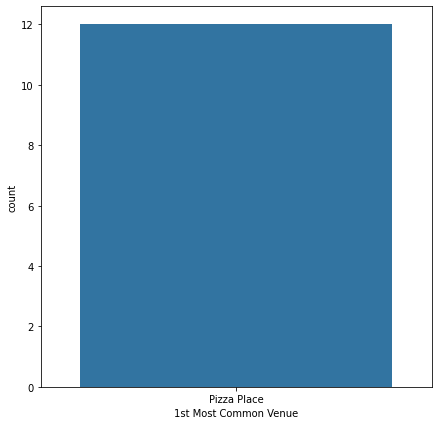

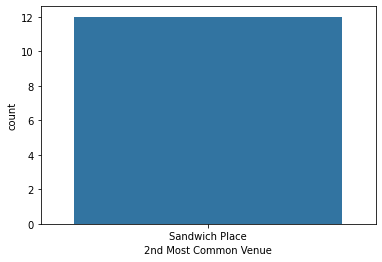

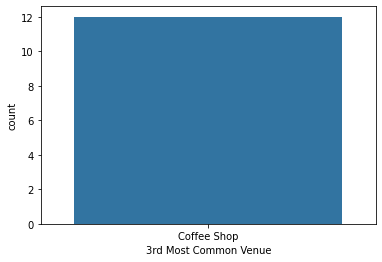

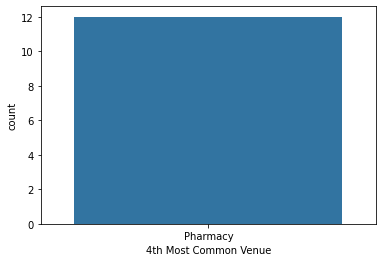

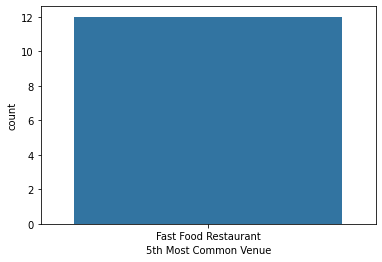

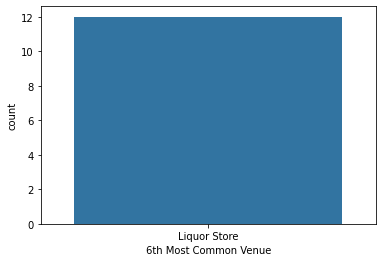

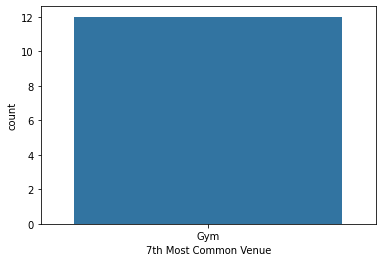

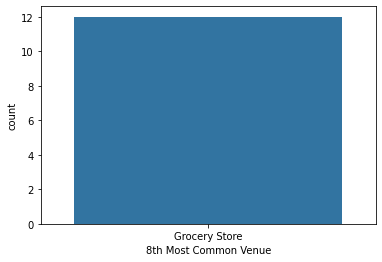

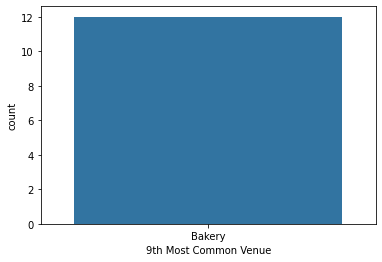

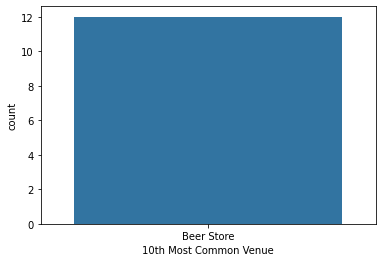

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

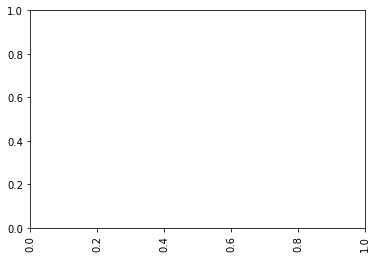

In [176]:
plt.figure(figsize = (7,7))
for h in range(3, 13):
    sns.countplot(data = cluster4, x = cluster4.iloc[:, h] )
    plt.show()
plt.xticks(rotation = 90)

### Cluster 4 - analysis
* #### This cluster mostly include burough Etobicoke: Venues include Pharmacy , Liquor store, sandwich shops, Bakery store - differ from other clusters which contain dining places and playground (putdoor activity areas)

### Cluster 5 - analysis

In [177]:
cluster5 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster5

,Latitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,43.806686,"[' Scarborough', ' Toronto', ' Golden Horsesho...",4,Fast Food Restaurant,Bank,Coffee Shop,Bakery,Pizza Place,Intersection,Breakfast Spot,Chinese Restaurant,Playground,Pharmacy
1,43.784535,"[' Scarborough', ' Toronto', ' Golden Horsesho...",4,Fast Food Restaurant,Bank,Coffee Shop,Bakery,Pizza Place,Intersection,Breakfast Spot,Chinese Restaurant,Playground,Pharmacy
2,43.763573,"[' Scarborough', ' Toronto', ' Golden Horsesho...",4,Fast Food Restaurant,Bank,Coffee Shop,Bakery,Pizza Place,Intersection,Breakfast Spot,Chinese Restaurant,Playground,Pharmacy
3,43.770992,"[' Scarborough', ' Toronto', ' Golden Horsesho...",4,Fast Food Restaurant,Bank,Coffee Shop,Bakery,Pizza Place,Intersection,Breakfast Spot,Chinese Restaurant,Playground,Pharmacy
4,43.773136,"[' Scarborough', ' Toronto', ' Golden Horsesho...",4,Fast Food Restaurant,Bank,Coffee Shop,Bakery,Pizza Place,Intersection,Breakfast Spot,Chinese Restaurant,Playground,Pharmacy
5,43.744734,"[' Scarborough', ' Toronto', ' Golden Horsesho...",4,Fast Food Restaurant,Bank,Coffee Shop,Bakery,Pizza Place,Intersection,Breakfast Spot,Chinese Restaurant,Playground,Pharmacy
6,43.727929,"[' Scarborough', ' Toronto', ' Golden Horsesho...",4,Fast Food Restaurant,Bank,Coffee Shop,Bakery,Pizza Place,Intersection,Breakfast Spot,Chinese Restaurant,Playground,Pharmacy
7,43.711112,"[' Scarborough', ' Toronto', ' Golden Horsesho...",4,Fast Food Restaurant,Bank,Coffee Shop,Bakery,Pizza Place,Intersection,Breakfast Spot,Chinese Restaurant,Playground,Pharmacy
8,43.716316,"[' Scarborough', ' Toronto', ' Golden Horsesho...",4,Fast Food Restaurant,Bank,Coffee Shop,Bakery,Pizza Place,Intersection,Breakfast Spot,Chinese Restaurant,Playground,Pharmacy
9,43.692657,"[' Scarborough', ' Toronto', ' Golden Horsesho...",4,Fast Food Restaurant,Bank,Coffee Shop,Bakery,Pizza Place,Intersection,Breakfast Spot,Chinese Restaurant,Playground,Pharmacy


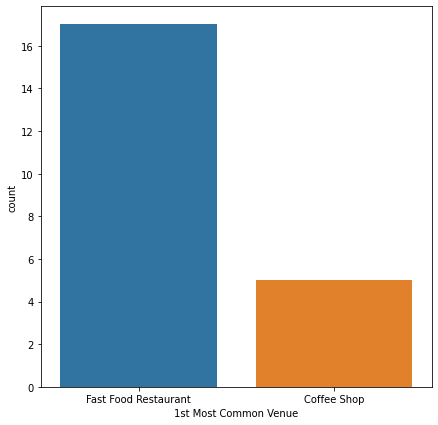

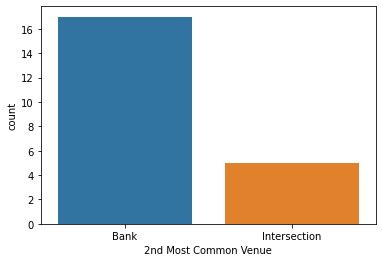

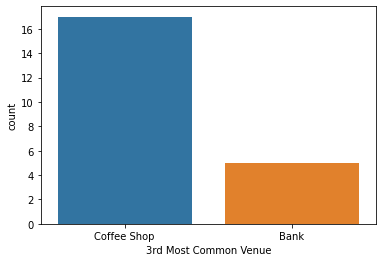

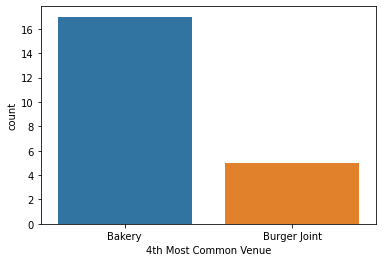

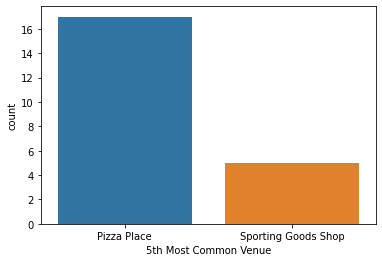

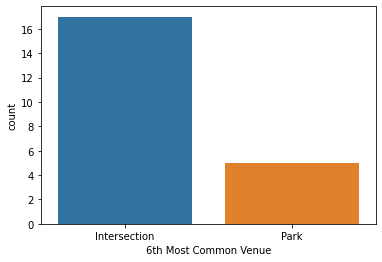

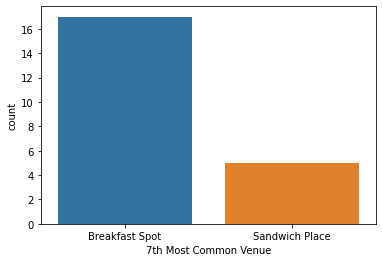

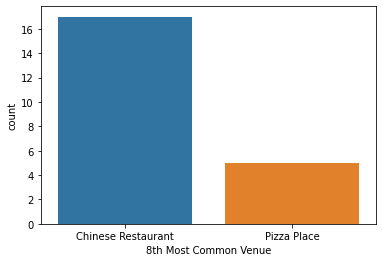

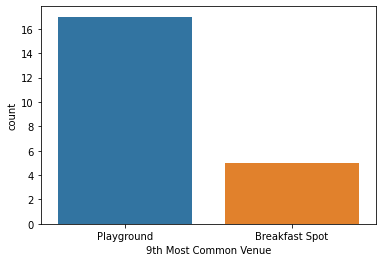

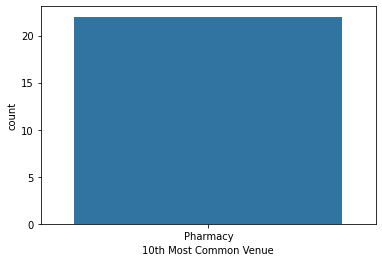

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

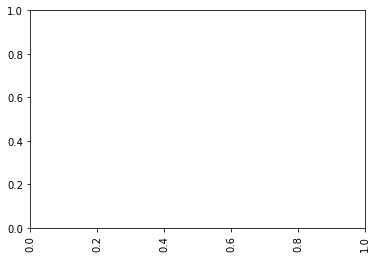

In [178]:
plt.figure(figsize = (7,7))
for h in range(3, 13):
    sns.countplot(data = cluster5, x = cluster5.iloc[:, h] )
    plt.show()
plt.xticks(rotation = 90)

### Cluster 5 analysis
* #### This cluster includes East york, Scarborough - the venues include Dining areas, playground, pharmacy